In [22]:
import numpy as np # Numpy is a fundamental package for scientific computation in python. Check it out if you don't know it already!
import pandas as pd
import matplotlib.pyplot as plt

# Data visualisation with Pandas and Matplotlib

## Pandas

import data as dataframe using pandas read_csv

Quick introduction can be found here : https://pandas.pydata.org/docs/user_guide/10min.html

In [23]:
data =  pd.read_csv('synth_data.txt',sep=';',names=['angle','intensity'],skiprows=1)

In [24]:
data

,angle,intensity
0,-5.00000,3.035860
1,-4.98999,2.902397
2,-4.97998,2.890226
3,-4.96997,2.953325
4,-4.95996,2.847500
...,...,...
995,4.95996,2.919206
996,4.96997,2.864416
997,4.97998,2.920909
998,4.98999,2.922681


You can extract the values of this dataframe easily in several ways:

In [25]:
data['intensity'], data.intensity #Both give the same result

(0      3.035860
 1      2.902397
 2      2.890226
 3      2.953325
 4      2.847500
          ...   
 995    2.919206
 996    2.864416
 997    2.920909
 998    2.922681
 999    2.934428
 Name: intensity, Length: 1000, dtype: float64,
 0      3.035860
 1      2.902397
 2      2.890226
 3      2.953325
 4      2.847500
          ...   
 995    2.919206
 996    2.864416
 997    2.920909
 998    2.922681
 999    2.934428
 Name: intensity, Length: 1000, dtype: float64)

In [28]:
data.intensity.values; #Remove the ';' to see the full glory

Pandas has some neat built in functions for some quick maths e.g. to calculate the mean of a column

In [29]:
data.intensity.mean(), data.intensity.std(), data.intensity.min(), data.intensity.max()

(3.9435234416869105, 0.5162251051659121, 2.847500417321436, 5.184228915730239)

## Matplotlib pyplot

You can plot (and save) data easily using matplotlib pyplot
https://matplotlib.org/stable/tutorials/introductory/pyplot.html

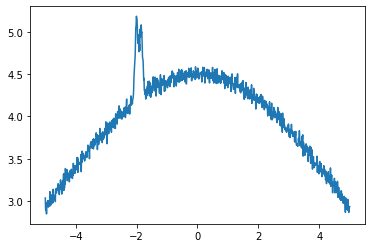

In [30]:
plt.plot(data['angle'],data['intensity'])

Select data of first peak using pandas.query

In [31]:
data_1st_peak = data.query('-2.5<angle<-1.5') 

You can easily adjust your plot and give it labels for example. For details have a look at the documentation and remember: Google is your friend

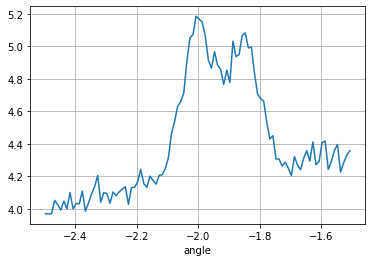

In [32]:
plt.plot(data_1st_peak['angle'],data_1st_peak['intensity'])
plt.xlabel('angle')
plt.grid()

## Fitting data using lmfit

Define the function that we want to model. Note that the most common functions are usually included in lmfit already.

In [33]:
def Gaussian(x, a, x0, sigma, offset=0):
    """
    1-dimensional Gaussian distribution

    Parameters
    ----------
    x : np.array
        Coordinates
    a : float
        Amplitude
    x0 : float
        Center
    sigma : float
        Standard deviation
    offset : float, optional
        Absolute offset value, defaults to 0

    Returns
    -------
    np.array
    """
    gauss = a * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.square((x-x0)/sigma))
    return offset + gauss

In [34]:
def Double_Gaussian_lin_off(x,a1,x01,sigma1,a2,x02,sigma2,ax,bx):
    '''Sum of two Gaussians and a linear offset 
    '''
    return Gaussian(x,a1,x01,sigma1)+Gaussian(x,a2,x02,sigma2)+ax*x+bx

Use lmfit to model data

In [35]:
import lmfit

Quick introduction to lmfit: https://lmfit.github.io/lmfit-py/model.html

In [36]:
gmodel = lmfit.Model(Double_Gaussian_lin_off)

In [37]:
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

parameter names: ['a1', 'x01', 'sigma1', 'a2', 'x02', 'sigma2', 'ax', 'bx']
independent variables: ['x']


Set the initial parameters for our model

In [38]:
init_params = dict(a1=0.11, x01=-2, sigma1=0.04,
                   a2=0.11, x02=-1.85, sigma2=0.04,
                   ax=0, bx=4)

In [39]:
params = gmodel.make_params(**init_params)

In [40]:
params

name,value,initial value,min,max,vary
a1,0.11000000,None,-inf,inf,True
x01,-2.00000000,None,-inf,inf,True
sigma1,0.04000000,None,-inf,inf,True
a2,0.11000000,None,-inf,inf,True
x02,-1.85000000,None,-inf,inf,True
sigma2,0.04000000,None,-inf,inf,True
ax,0.00000000,None,-inf,inf,True
bx,4.00000000,None,-inf,inf,True


Test our model guess to see if it roughly fits the data

In [41]:
x_eval = np.linspace(-2.5,-1.5)
y_eval = gmodel.eval(x=x_eval,params = params)

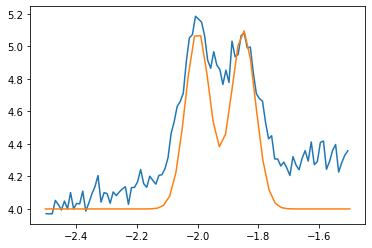

In [42]:
plt.plot(data_1st_peak['angle'],data_1st_peak['intensity'])
plt.plot(x_eval,y_eval)

Now perform the actual fit with our parameter guess

In [43]:
result = gmodel.fit(data=data_1st_peak['intensity'], params=params, x=data_1st_peak['angle'])

retrieve the parameters and their uncertainties from the fit 

In [44]:
result.params

name,value,standard error,relative error,initial value,min,max,vary
a1,0.12589582,0.00557085,(4.42%),0.11,-inf,inf,True
x01,-2.00066809,0.00247830,(0.12%),-2,-inf,inf,True
sigma1,0.05319513,0.00238031,(4.47%),0.04,-inf,inf,True
a2,0.09771845,0.00558466,(5.72%),0.11,-inf,inf,True
x02,-1.85089183,0.00283757,(0.15%),-1.85,-inf,inf,True
sigma2,0.04933394,0.00267577,(5.42%),0.04,-inf,inf,True
ax,0.32966960,0.01989471,(6.03%),0,-inf,inf,True
bx,4.84270815,0.04140036,(0.85%),4,-inf,inf,True


Extracting the actual value (and its uncertainty) of a fitted parameter is a bit tricky but works as follows:

In [45]:
result.params['x01'].value, result.params['x01'].stderr

(-2.0006680890686153, 0.0024782961672320638)

Compare fit to data and save the plot

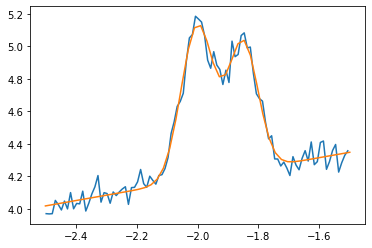

In [46]:
plt.plot(data_1st_peak['angle'],data_1st_peak['intensity'])
plt.plot(x_eval,result.eval(params=result.params,x=x_eval))
plt.savefig('fitted_data.png')

recieve the fit report that includes a lot of interesting parameters like red. chi-square

In [47]:
result

If you have questions or feedback regarding this notebook please feel free to write an email to nk7@uni-bonn.de . Cheers, Nick